In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

from bs4 import BeautifulSoup
import requests

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# pip install webdriver-manager
# from webdriver_manager.chrome import ChromeDriverManager # 크롬 버전 알아서 맞춰줌
from selenium.webdriver.chrome.service import Service

import time

In [11]:
driver = webdriver.Chrome("C:/Users/user/Desktop/원석/국비지원/중간프로젝트/chromedriver_win32/chromedriver")
driver.get("https://golmok.seoul.go.kr/stateArea.do") # 큰 화면으로 실행

driver.find_element(By.ID, "population").click()

C:\Users\user\AppData\Local\Temp\ipykernel_17208\2601549217.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/user/Desktop/원석/국비지원/중간프로젝트/chromedriver_win32/chromedriver")


In [12]:
year= driver.find_element(By.ID, "selectYear")
year.click()
tag= year.find_elements(By.TAG_NAME, 'option')
for i in tag:
    print(i.text)
    if i.text=='2020년':
        i.click()
        
qu= driver.find_element(By.ID, "selectQu")
qu.click()
tag= qu.find_elements(By.TAG_NAME, 'option')  
for i in tag:
    print(i.text)
    if i.text=='4분기':
        i.click()
        
qucon= driver.find_element(By.ID, "selectQuCondition")
qucon.click()
tag= qucon.find_elements(By.TAG_NAME, 'option')  
for i in tag:    
    print(i.text)
    if i.text=='전분기':
        i.click()

driver.find_element(By.ID, "presentSearch").click()

time.sleep(3)

2022년
2021년
2020년
2019년
2018년
2017년
4분기
3분기
2분기
1분기
동분기
전분기


In [13]:
구=[]
유동인구=[]
직장인구=[]

trs= driver.find_elements(By.CLASS_NAME, 'branch')
for tr in trs[1:26]:
#     print(tr.text)
    texts= tr.text.replace(',','').split()
    print(texts)
    구.append(texts[0])
    s_p=[int(texts[1]), int(texts[4]), int(texts[7])]
    w_p=[int(texts[3]), int(texts[6]), int(texts[9])]
    유동인구.append(sum(s_p)/3)
    직장인구.append(sum(w_p)/3)

['종로구', '20666', '64', '99', '20487', '64', '99', '20354', '63', '99']
['중구', '47501', '125', '336', '46712', '125', '336', '45825', '126', '336']
['용산구', '26881', '106', '83', '26508', '106', '83', '26108', '108', '83']
['성동구', '40033', '182', '49', '39616', '182', '49', '39251', '177', '49']
['광진구', '53534', '198', '46', '52479', '198', '46', '52149', '196', '46']
['동대문구', '68959', '235', '55', '67884', '235', '55', '67535', '236', '55']
['중랑구', '53239', '217', '22', '53172', '217', '22', '53543', '216', '22']
['성북구', '44673', '171', '45', '43499', '171', '45', '43407', '177', '45']
['강북구', '36384', '133', '12', '35839', '133', '12', '35796', '130', '12']
['도봉구', '30101', '160', '17', '29897', '160', '17', '29714', '156', '17']
['노원구', '27112', '150', '16', '26677', '150', '16', '26611', '147', '16']
['은평구', '38579', '153', '16', '38534', '153', '16', '38431', '154', '16']
['서대문구', '52638', '178', '38', '51112', '178', '38', '51765', '180', '38']
['마포구', '44050', '127', '58', '43575'

In [14]:
tag= driver.find_elements(By.TAG_NAME, 'option')
for i in tag:
#     print(i.text)
    if i.text=='2020년':
        i.click()
    if i.text=='3분기':
        i.click()
    if i.text=='전분기':
        i.click()
driver.find_element(By.ID, "presentSearch").click()
time.sleep(2)

In [15]:
# 유동=[]
# 직장=[]

# trs= driver.find_elements(By.CLASS_NAME, 'branch')
# for tr in trs[1:26]:

#     texts= tr.text.replace(',','').split()
#     print(texts)
#     s_p=int(texts[1])
#     w_p=int(texts[3])
#     유동.append(s_p)
#     직장인구.append(w_p)

In [16]:
유동=[]
직장=[]
trs= driver.find_elements(By.CLASS_NAME, 'branch')

for tr in trs[1:26]:
#     print(tr.text)
    texts= tr.text.replace(',','').split()
    print(texts)
#     구.append(texts[0])
    유동.append(int(texts[1]))
    직장.append(int(texts[3]))
유동

['종로구', '20743', '64', '99', '20666', '64', '99', '20487', '64', '99']
['중구', '48398', '125', '336', '47501', '125', '336', '46712', '125', '336']
['용산구', '27337', '106', '83', '26881', '106', '83', '26508', '106', '83']
['성동구', '41003', '182', '49', '40033', '182', '49', '39616', '182', '49']
['광진구', '53780', '198', '46', '53534', '198', '46', '52479', '198', '46']
['동대문구', '69151', '235', '55', '68959', '235', '55', '67884', '235', '55']
['중랑구', '54318', '217', '22', '53239', '217', '22', '53172', '217', '22']
['성북구', '44807', '171', '45', '44673', '171', '45', '43499', '171', '45']
['강북구', '37203', '133', '12', '36384', '133', '12', '35839', '133', '12']
['도봉구', '30719', '160', '17', '30101', '160', '17', '29897', '160', '17']
['노원구', '27407', '150', '16', '27112', '150', '16', '26677', '150', '16']
['은평구', '39097', '153', '16', '38579', '153', '16', '38534', '153', '16']
['서대문구', '53376', '178', '38', '52638', '178', '38', '51112', '178', '38']
['마포구', '44681', '127', '58', '44050'

[20743,
 48398,
 27337,
 41003,
 53780,
 69151,
 54318,
 44807,
 37203,
 30719,
 27407,
 39097,
 53376,
 44681,
 48513,
 27480,
 37201,
 31894,
 44888,
 50922,
 44950,
 20415,
 36380,
 37948,
 46523]

In [17]:
유동인구

[20502.333333333332,
 46679.333333333336,
 26499.0,
 39633.333333333336,
 52720.666666666664,
 68126.0,
 53318.0,
 43859.666666666664,
 36006.333333333336,
 29904.0,
 26800.0,
 38514.666666666664,
 51838.333333333336,
 43455.666666666664,
 46759.333333333336,
 27387.333333333332,
 36647.666666666664,
 30864.666666666668,
 43906.0,
 49442.666666666664,
 43358.0,
 19963.333333333332,
 35103.333333333336,
 36688.333333333336,
 44006.333333333336]

In [18]:
data={'gu':구, '1분기유동인구': 유동, '2~4분기유동인구': 유동인구}
df1= pd.DataFrame(data)
df1['평균유동인구']= df1.mean(axis=1)
df1.to_csv('평균유동인구.csv', index=False)
df1

C:\Users\user\AppData\Local\Temp\ipykernel_17208\673093607.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1['평균유동인구']= df1.mean(axis=1)


,gu,1분기유동인구,2~4분기유동인구,평균유동인구
0,종로구,20743,20502.333333,20622.666667
1,중구,48398,46679.333333,47538.666667
2,용산구,27337,26499.000000,26918.000000
3,성동구,41003,39633.333333,40318.166667
4,광진구,53780,52720.666667,53250.333333
5,동대문구,69151,68126.000000,68638.500000
6,중랑구,54318,53318.000000,53818.000000
7,성북구,44807,43859.666667,44333.333333
8,강북구,37203,36006.333333,36604.666667
9,도봉구,30719,29904.000000,30311.500000


In [19]:
data={'gu':구, '1분기직장인구': 직장, '2~4분기직장인구': 직장인구}
df2= pd.DataFrame(data)
df2['평균직장인구']=df2.mean(axis=1)
df2.to_csv('평균직장인구.csv', index=False)
df2

C:\Users\user\AppData\Local\Temp\ipykernel_17208\522403996.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2['평균직장인구']=df2.mean(axis=1)


,gu,1분기직장인구,2~4분기직장인구,평균직장인구
0,종로구,99,99.0,99.0
1,중구,336,336.0,336.0
2,용산구,83,83.0,83.0
3,성동구,49,49.0,49.0
4,광진구,46,46.0,46.0
5,동대문구,55,55.0,55.0
6,중랑구,22,22.0,22.0
7,성북구,45,45.0,45.0
8,강북구,12,12.0,12.0
9,도봉구,17,17.0,17.0


In [20]:
merge= pd.merge(df1, df2, on='gu')
merge

,gu,1분기유동인구,2~4분기유동인구,평균유동인구,1분기직장인구,2~4분기직장인구,평균직장인구
0,종로구,20743,20502.333333,20622.666667,99,99.0,99.0
1,중구,48398,46679.333333,47538.666667,336,336.0,336.0
2,용산구,27337,26499.000000,26918.000000,83,83.0,83.0
3,성동구,41003,39633.333333,40318.166667,49,49.0,49.0
4,광진구,53780,52720.666667,53250.333333,46,46.0,46.0
5,동대문구,69151,68126.000000,68638.500000,55,55.0,55.0
6,중랑구,54318,53318.000000,53818.000000,22,22.0,22.0
7,성북구,44807,43859.666667,44333.333333,45,45.0,45.0
8,강북구,37203,36006.333333,36604.666667,12,12.0,12.0
9,도봉구,30719,29904.000000,30311.500000,17,17.0,17.0


In [21]:
result= merge[['gu','평균유동인구','평균직장인구']]
result= result.set_index('gu')
result

,평균유동인구,평균직장인구
gu,,
종로구,20622.666667,99.0
중구,47538.666667,336.0
용산구,26918.000000,83.0
성동구,40318.166667,49.0
광진구,53250.333333,46.0
동대문구,68638.500000,55.0
중랑구,53818.000000,22.0
성북구,44333.333333,45.0
강북구,36604.666667,12.0


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Person Correlation of Features'}>

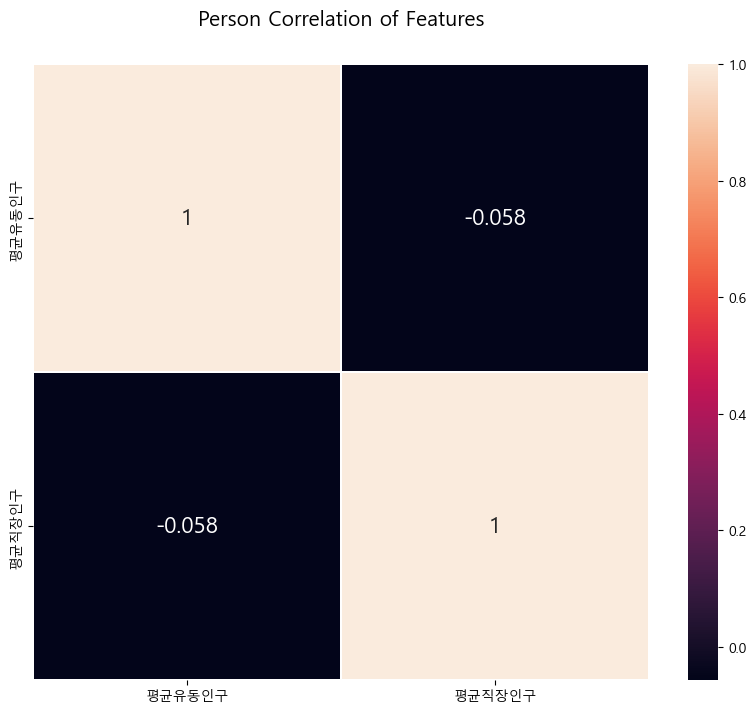

In [23]:
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(result.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [33]:
import json
geo=json.load(open("C:/Users/user/ows4591/anaconda3/skorea_municipalities_geo_simple_seoul.json",
                  encoding="utf-8"))

import folium

map = folium.Map(location=[37.5000195, 127.0229206],zoom_start=11)


map.choropleth(geo_data=geo,  data=result["평균유동인구"], 
               key_on="feature.id",
               columns=["평균유동인구"],
               fill_color="PuRd")
map

C:\Users\user\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<AxesSubplot:ylabel='gu'>

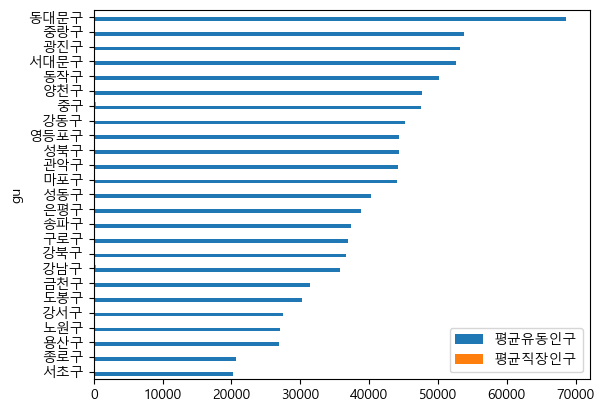

In [32]:
result.sort_values(by=['평균유동인구','평균직장인구']).plot.barh()